# Data Image (Struktured)

## Import Package

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

## Import Data

In [3]:
df = pd.read_csv("data/data/small_mnist.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#cek range angkanya 0-255 atau 0-1 (untuk normalisasi)
df.iloc[:1].values.max()

255

## Dataset Splitting

In [10]:
#convert dari data frame ke numpy >> values
X = df.drop(columns="label").values/255
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

In [12]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Visualize Random Data

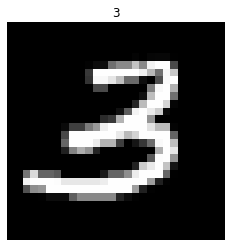

In [44]:
import matplotlib.pyplot as plt

N = len(X_train) #menyimpan banyaknya data dari X_train
idx = np.random.choice(N) #random diantara sampai banyak N
img, label = X_train[idx], y_train[idx] #pilih gambar secara acak berdasarkan index_col

plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(label)
plt.axis('off');

## Training

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [47]:
#tidak ada preprocessor karna data image

pipeline = Pipeline([
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])



model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.2min finished


{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}
0.999375 0.9025057795953932 0.9275


## Visualize Prediction

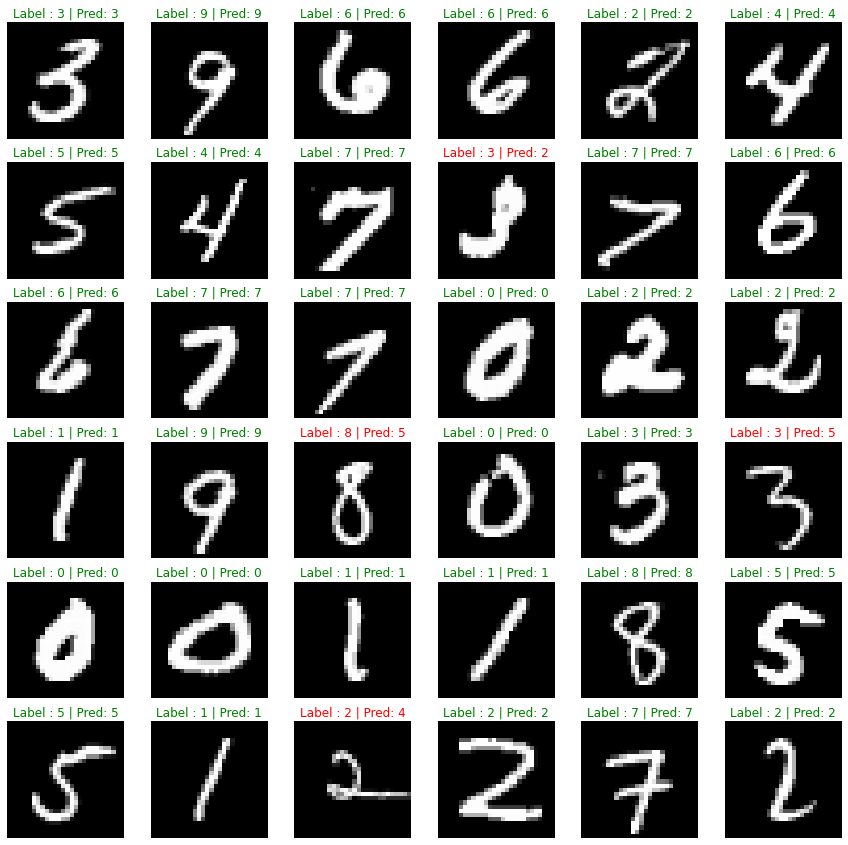

In [59]:
idx = np.random.choice(len(X_test), size=36, replace=False)
images, labels = X_test[idx],y_test[idx]
preds = model.predict(images)

fig, axes = plt.subplots(6,6, figsize=(15,15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {"color" : "g"} if label == pred else {"color":"r"}
    
    ax.imshow(img.reshape(28,28), cmap="gray")
    ax.set_title(f"Label : {label} | Pred: {pred}", fontdict=font)
    ax.axis("off");

## Why it Works?
    Kenapa sesimple flattening itu jalan?

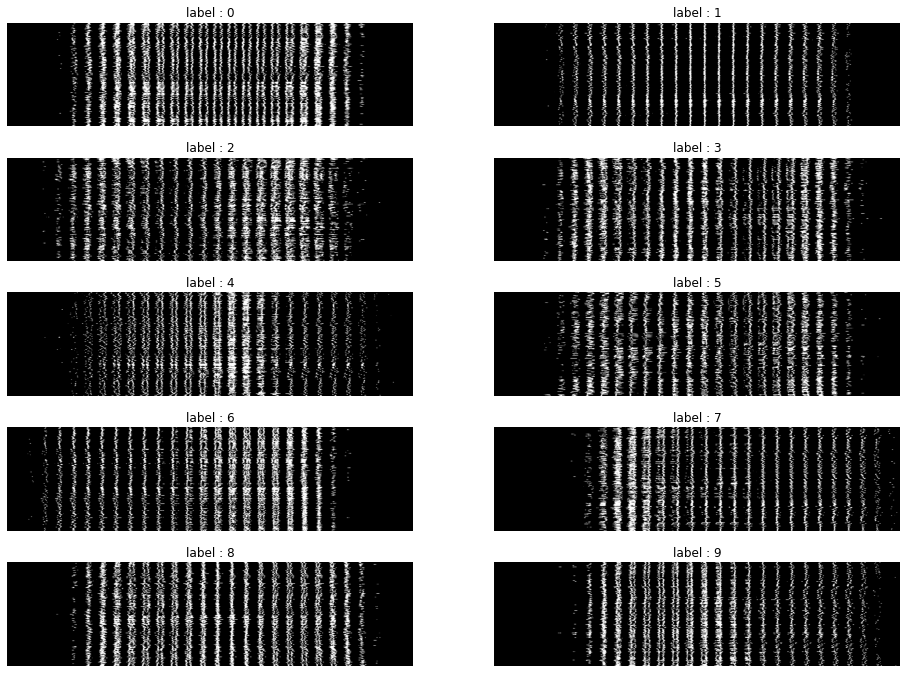

In [58]:
fig, axes = plt.subplots(5,2, figsize=(16,12))

for idx, ax in enumerate(axes.flatten()):
    ax.imshow(df.iloc[idx*200:(idx+1)*200], cmap="gray")
    ax.set_title(f"label : {idx}")
    ax.axis("off");
    
#karna mempunyai pola(pattern) pada setiap angka/gambar dan mesin paling bisa mencari pola(pattern)